In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import scipy.io
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, mean_squared_error, roc_curve
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from scipy import stats
from math import sqrt
from sklearn.utils import resample

In [2]:
mat_file= scipy.io.loadmat('LOSS.mat')
mat_file_pay = scipy.io.loadmat('PAY.mat')

np_array = np.array(mat_file['LOSS'])
df6 = pd.DataFrame(np_array)
df6.columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
df6.insert(len(df6.columns),'Loss', 1)
df6.head()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Renovation,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Loss
0,697399.0,1.35,69.4,7250000.0,5.25,0.0312,5.2188,1998.0,100.0,22919.0,7.663725,351.880464,1.136903,4.144921,0.143158,0.127688,5.0,1
1,1088638.0,1.36,61.3,9100000.0,5.52,0.0312,5.4888,1984.0,95.4,23129.0,8.779339,463.441807,1.502204,4.144921,0.310453,0.242793,21.0,1
2,618081.0,1.31,66.0,6650000.0,5.45,0.0312,5.4188,2001.0,87.2,32504.0,7.358107,293.888839,1.076208,4.419219,0.110992,0.101224,2.0,1
3,260695.0,1.55,64.2,2600000.0,5.21,0.1112,5.0988,1965.0,100.0,32376.0,7.781940,353.971808,3.315033,4.242222,0.117658,0.080235,40.0,1
4,607133.0,1.26,65.8,6500000.0,5.29,0.0312,5.2588,1970.0,100.0,12942.0,7.404061,316.183875,2.961139,4.242222,0.274014,0.196397,4.0,1


In [3]:
df7 = pd.DataFrame(np.array(mat_file_pay['PAY']))
df7.columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
df7.insert(len(df7.columns),'Loss', 0)
df7.head()


#Create a balanced dataframe (not working)
df7_downsampled = resample(df7, replace=False, n_samples=df6.shape[0], random_state=123)

In [4]:
data_clean = pd.concat([df6,df7], ignore_index = True)
print(data_clean)

            NOI    DSCR      LTV     Balance  Rate     Fee  Net Mortgage Rate  \
0      697399.0  1.3500  69.4000  7250000.00  5.25  0.0312             5.2188   
1     1088638.0  1.3600  61.3000  9100000.00  5.52  0.0312             5.4888   
2      618081.0  1.3100  66.0000  6650000.00  5.45  0.0312             5.4188   
3      260695.0  1.5500  64.2000  2600000.00  5.21  0.1112             5.0988   
4      607133.0  1.2600  65.8000  6500000.00  5.29  0.0312             5.2588   
...         ...     ...      ...         ...   ...     ...                ...   
4788   156294.0  1.4442  54.1815  1029447.80  7.40  0.0624             7.3376   
4789   172837.0  1.3260  61.6591  1257845.64  7.40  0.0624             7.3376   
4790   104557.0  1.2949  67.2535   823855.65  7.50  0.0624             7.4376   
4791   737888.0  1.3268  73.3318  5679548.69  8.28  0.0624             8.2176   
4792   482735.0  1.2779  72.5958  3629791.06  8.35  0.0624             8.2876   

      Year Built  Renovatio

In [8]:
data_standarized = data_clean
to_standarize = data_clean.columns
columns = to_standarize.drop('Loss')
for x in columns:
    data_standarized[x] = (data_standarized[x]-data_standarized[x].mean())/data_standarized[x].std()
data_standarized.head()


,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Renovation,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Loss
0,-0.211228,-0.182962,0.400089,-0.213673,-0.804509,-0.524792,-0.786586,0.745735,0.741209,-0.606508,0.134320,0.328944,-0.170708,-0.703855,-0.390360,-0.359849,-0.506103,1
1,-0.022791,-0.160088,-0.314037,-0.113422,-0.467389,-0.524792,-0.448108,0.072508,0.202045,-0.593987,0.716255,0.913257,-0.064993,-0.703855,-0.115806,-0.162305,0.935813,1
2,-0.249430,-0.274458,0.100332,-0.246186,-0.554791,-0.524792,-0.535862,0.889998,-0.759074,-0.035014,-0.025098,0.025207,-0.188273,-0.182816,-0.443149,-0.405267,-0.776463,1
3,-0.421562,0.274518,-0.058362,-0.465653,-0.854453,2.080245,-0.937021,-0.841158,0.741209,-0.042646,0.195985,0.339897,0.459629,-0.519027,-0.432209,-0.441289,2.648088,1
4,-0.254703,-0.388828,0.082700,-0.254315,-0.754565,-0.524792,-0.736441,-0.600720,0.741209,-1.201375,-0.001128,0.141979,0.357214,-0.519027,-0.175608,-0.241930,-0.596223,1


In [23]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
data_normalized = pd.DataFrame(normalize(data_clean))

In [5]:
X= data_clean.drop('Loss', axis=1)
X.head()


,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Renovation,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR
0,697399.0,1.35,69.4,7250000.0,5.25,0.0312,5.2188,1998.0,100.0,22919.0,7.663725,351.880464,1.136903,4.144921,0.143158,0.127688,5.0
1,1088638.0,1.36,61.3,9100000.0,5.52,0.0312,5.4888,1984.0,95.4,23129.0,8.779339,463.441807,1.502204,4.144921,0.310453,0.242793,21.0
2,618081.0,1.31,66.0,6650000.0,5.45,0.0312,5.4188,2001.0,87.2,32504.0,7.358107,293.888839,1.076208,4.419219,0.110992,0.101224,2.0
3,260695.0,1.55,64.2,2600000.0,5.21,0.1112,5.0988,1965.0,100.0,32376.0,7.781940,353.971808,3.315033,4.242222,0.117658,0.080235,40.0
4,607133.0,1.26,65.8,6500000.0,5.29,0.0312,5.2588,1970.0,100.0,12942.0,7.404061,316.183875,2.961139,4.242222,0.274014,0.196397,4.0


In [6]:
Y = data_clean['Loss']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Loss, dtype: int64

In [53]:
data_clean.head()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Renovation,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Loss
0,-0.211228,-0.182962,0.400089,-0.213673,-0.804509,-0.524792,-0.786586,0.745735,0.741209,-0.606508,0.134320,0.328944,-0.170708,-0.703855,-0.390360,-0.359849,-0.506103,1
1,-0.022791,-0.160088,-0.314037,-0.113422,-0.467389,-0.524792,-0.448108,0.072508,0.202045,-0.593987,0.716255,0.913257,-0.064993,-0.703855,-0.115806,-0.162305,0.935813,1
2,-0.249430,-0.274458,0.100332,-0.246186,-0.554791,-0.524792,-0.535862,0.889998,-0.759074,-0.035014,-0.025098,0.025207,-0.188273,-0.182816,-0.443149,-0.405267,-0.776463,1
3,-0.421562,0.274518,-0.058362,-0.465653,-0.854453,2.080245,-0.937021,-0.841158,0.741209,-0.042646,0.195985,0.339897,0.459629,-0.519027,-0.432209,-0.441289,2.648088,1
4,-0.254703,-0.388828,0.082700,-0.254315,-0.754565,-0.524792,-0.736441,-0.600720,0.741209,-1.201375,-0.001128,0.141979,0.357214,-0.519027,-0.175608,-0.241930,-0.596223,1


In [49]:
data_normalized.head()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Renovation,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Loss
0,0.020436,0.016397,0.815897,0.024381,0.229508,0.104874,0.555316,0.953368,1.000000,0.204197,0.525632,0.573800,0.571973,0.262580,0.015077,0.013145,0.047619,1.0
1,0.032584,0.016861,0.720670,0.030998,0.278689,0.104874,0.584045,0.880829,0.953535,0.206093,0.614106,0.661633,0.578654,0.262580,0.034106,0.026155,0.200000,1.0
2,0.017973,0.014541,0.775925,0.022234,0.265938,0.104874,0.576597,0.968912,0.870707,0.290712,0.501395,0.528142,0.570863,0.309777,0.011418,0.010153,0.019048,1.0
3,0.006876,0.025677,0.754764,0.007748,0.222222,0.373782,0.542547,0.782383,1.000000,0.289557,0.535007,0.575446,0.611808,0.279322,0.012176,0.007781,0.380952,1.0
4,0.017633,0.012221,0.773574,0.021698,0.236794,0.104874,0.559572,0.808290,1.000000,0.114144,0.505039,0.545695,0.605336,0.279322,0.029961,0.020911,0.038095,1.0


In [31]:
def confu(y_test, y_pred):
    plt.figure(figsize=(7,3))
    cm = confusion_matrix(y_test, y_pred)
    class_label = ['High Risk', 'Low Risk']
    DataSet_cm = pd.DataFrame(cm, index=class_label, columns =class_label)
    sns.heatmap(DataSet_cm, annot =True, cmap = 'OrRd', linewidths = 2, fmt='d')
    plt.title("Confusion Matrix", fontsize = 15)
    plt.xlabel('Predected')
    plt.ylabel('Real')
    plt.show()
            
    acc=accuracy_score(y_test,y_pred)
    mse=mean_squared_error(y_test, y_pred)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
    print('Precision: {:.4f}% \nRecall: {:.4f}% \nF1-Score: {:.4f}% \nAccuracy: {:.4f}% \nMean Square Error: {:.4f}'.format(precision*100, recall*100, fscore*100, acc*100, mse))
    
    
    sk.metrics.roc_curve(y_test, y_pred, pos_label=None, sample_weight=None, drop_intermediate=True)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
    display.plot()  
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show() 
    
    
    
    from sklearn.metrics import roc_curve
    # calculating the probabilities
    y_pred_prob = modelo_lr.predict_proba(X_test)[:,1]
0
    # instantiating the roc_cruve
    fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

    # plotting the curve
    plt.plot([0,1],[0,1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot(fpr,tpr,label='Logistic Regression')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

IndentationError: unexpected indent (<ipython-input-31-ed8754c8f4bf>, line 35)

In [34]:
def confuoverfitting(y_test, y_pred):
    plt.figure(figsize=(7,3))
    cm = confusion_matrix(y_test, y_pred)
    class_label = ['High Risk', 'Low Risk']
    DataSet_cm = pd.DataFrame(cm, index=class_label, columns =class_label)
    sns.heatmap(DataSet_cm, annot =True, cmap = 'OrRd', linewidths = 2, fmt='d')
    plt.title("Confusion Matrix", fontsize = 15)
    plt.xlabel('Predected')
    plt.ylabel('Real')
    plt.show()
    
        
    acc=accuracy_score(y_test,y_pred)
    mse=mean_squared_error(y_test, y_pred)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
    print('Precision: {:.4f}% \nRecall: {:.4f}% \nF1-Score: {:.4f}% \nAccuracy: {:.4f}% \nMean Square Error: {:.4f}'.format(precision*100, recall*100, fscore*100, acc*100, mse))
    
    
    sk.metrics.roc_curve(y_test, y_pred, pos_label=None, sample_weight=None, drop_intermediate=True)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
    display.plot()  
    plt.title('ROC Curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show() 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

X_train.head()
#y_train.head()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Renovation,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR
3471,2636537.0,1.370000,69.705100,26000000.0,6.012,0.02090,5.99110,2000.0,96.40,23652.0,7.068464,209.033881,2.107462,4.978125,0.719689,0.574724,7.0
4148,1408391.0,1.512854,68.403909,21000000.0,5.181,0.04072,5.14028,1995.0,95.28,41702.0,4.587593,14.124363,0.079634,4.446349,0.354037,0.453328,10.0
857,167056.0,1.257961,79.734390,1760000.0,6.450,0.05097,6.39903,2005.0,100.00,44229.0,7.593455,261.532955,2.123048,4.978125,0.042167,0.032893,1.0
1700,355322.0,1.300000,61.300000,2992000.0,5.670,0.09240,5.57760,1972.0,96.70,25666.0,9.500588,522.646125,2.910262,4.274127,0.193695,0.123697,32.0
2212,1915689.0,2.610000,60.000000,16500000.0,4.510,0.04190,4.46810,2001.0,100.00,24010.0,6.966142,285.379807,0.797673,4.112344,0.377790,0.402393,2.0


In [25]:
models= {}
def cross_validation(model, name_model):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)
    print(scores)
    meanaux= mean(scores).item()
    stdaux = std(scores).item()
    lenaux = len(scores)
    models[name_model] = [meanaux, stdaux, lenaux]



# LOGISTIC REGRESSION


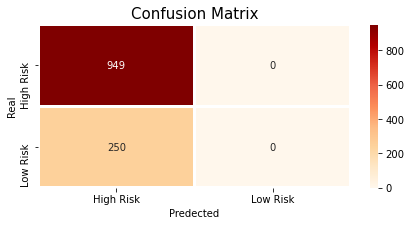

NameError: name 'precision_score' is not defined

In [35]:
modelo_lr = LogisticRegression()
modelo_lr.fit(X_train, y_train)
y_pred = modelo_lr.predict(X_test)
#accuracy_score(y_test, y_pred)
confu(y_test, y_pred)

In [66]:
model=LogisticRegression()
cross_validation(model, "Logistic Regression")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


TypeError: 'float' object is not callable

In [18]:
#KNN
model = KNeighborsClassifier(n_neighbors=21)
cross_validation(model, "KNN")

[0.07894737 0.06944444 0.07352941 0.01388889 0.11111111 0.01851852
 0.05194805 0.05633803 0.08536585 0.04      ]


In [19]:
#SVM
model = SVC()
cross_validation(model, "SVM")

[0.01315789 0.04166667 0.07352941 0.         0.08333333 0.
 0.03896104 0.04225352 0.04878049 0.01333333]


In [20]:
#Random Forest
model = DecisionTreeClassifier()
cross_validation(model, "Random Forest")

[0.34210526 0.38888889 0.22058824 0.27777778 0.375      0.31481481
 0.25974026 0.35211268 0.25609756 0.18666667]



               Recall

Model                Mean       Standard Deviation
Logistic Regression  3.95%     2.21%
KNN                  5.99%     2.87%
SVM                  3.55%     2.74%
Random Forest        29.74%     6.43%



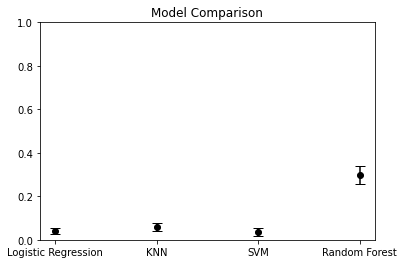

In [22]:
x = []
y = []
errors = []
print('\033[1m')
print(" "*15+"Recall", end="\n\n")
print("{:<20} {:<10} {}".format('Model','Mean','Standard Deviation'),end="")
print('\033[0m')
for name, statistics in models.items():
    x.append(name)
    mean = statistics[0]
    std = statistics[1]
    n = statistics[2]
    y.append(mean)
    z = stats.norm.ppf(0.975)
    error = z * std / sqrt(n)
    errors.append(error)
    print("{:<20} {:.2f}{:<5} {:.2f}{}".format(name, mean*100, "%", std*100, "%"))
    
print()
plt.figure()
plt.errorbar(x, y, yerr=errors, fmt = 'o', color = 'k', capsize=5)
plt.title('Model Comparison')
plt.ylim([0, 1.00])
plt.show()

In [41]:
X_train.head()
X_train.shape[0]
X_test.shape[0]

1199